# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

# <font color = hotpink>PREDICTING RATING SCORE ON AIRBNB NYC DATA</font>

In [3]:
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, header = 0)

In [4]:
df.shape

(28022, 50)

In [5]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [7]:
len(df['host_total_listings_count'].unique())

73

In [8]:
len(df['host_location'].unique())

1365


<b>I am now going to make a seperate dataframe to train models with the label of 'review_socres_rating'</b>


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [9]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [10]:
objects = list(df.select_dtypes(['object']))
objects

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'neighbourhood_group_cleansed',
 'room_type',
 'amenities']

In [11]:
df = df.drop(columns = ['name','description','neighborhood_overview','host_name','host_location',
 'host_about','amenities', 'host_acceptance_rate'], axis =1)
df.dtypes

host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          

In [12]:
df_rate = df.drop(columns = ['host_total_listings_count','host_has_profile_pic', 'host_identity_verified',
                             'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                              'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
                              'maximum_nights_avg_ntm'], axis = 1)
df_rate.dtypes

host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
has_availability                                   bool
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
number_of_reviews                                 int64
number_of_reviews_ltm                             int64
number_of_reviews_l30d                          

# <font color=blue> Finding missing values:</font>

In [13]:
nan_count_df_rate = np.sum(df_rate.isnull(), axis = 0)
nan_count_df_rate

host_response_rate                              11843
host_is_superhost                                   0
host_listings_count                                 0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
has_availability                                    0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
review_scores_rating        

In [14]:
df_rate.loc[df_rate['bedrooms'].isnull()].head()

,host_response_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.8,True,8.0,Manhattan,Entire home/apt,1,1.0,NaN,1.0,150.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
6,1.0,True,1.0,Brooklyn,Entire home/apt,3,1.0,NaN,1.0,89.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
10,1.0,True,4.0,Brooklyn,Entire home/apt,4,1.0,NaN,2.0,299.0,...,4.60,5.00,4.80,False,1,1,0,0,0.06,4
12,0.0,True,1.0,Manhattan,Entire home/apt,2,1.0,NaN,1.0,175.0,...,5.00,4.95,4.58,False,1,1,0,0,0.55,4
59,1.0,True,1.0,Manhattan,Entire home/apt,3,1.0,NaN,2.0,100.0,...,4.89,4.79,4.74,False,1,1,0,0,0.20,6


In [15]:
# compute mean for all non null age values
mean =df_rate['host_response_rate'].mean()
df_rate['host_response_rate'].fillna(value=mean, inplace=True)

print("Row 0:  " + str(df_rate['bedrooms'][0]))
mean_berooms =df_rate['bedrooms'].mean()
df_rate['bedrooms'].fillna(value=mean_berooms, inplace=True)

print("Row 0:  " + str(df_rate['bedrooms'][0]))

mean_beds= df_rate['beds'].mean()
df_rate['beds'].fillna(value=mean_beds, inplace=True)

Row 0:  nan
Row 0:  1.3297084130019121


In [16]:
nan_count_df_rate_after = np.sum(df_rate.isnull(), axis = 0)
nan_count_df_rate_after

host_response_rate                              0
host_is_superhost                               0
host_listings_count                             0
neighbourhood_group_cleansed                    0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_cleanliness                       0


## <font color=purple> Hot Encoding: </font>

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df_rate[['neighbourhood_group_cleansed','room_type']]))

df_enc.columns = encoder.get_feature_names(['neighbourhood_group_cleansed','room_type'])

In [18]:
df_rate['neighbourhood_group_cleansed'].nunique()

5

In [19]:
df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df_rate = df_rate.join(df_enc)

# Remove the original categorical features from X_train and X_test:
df_rate = df_rate.drop(columns = ['neighbourhood_group_cleansed','room_type'] ,axis=1)


In [21]:
df_rate.dtypes

host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
has_availability                                   bool
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
number_of_reviews                                 int64
number_of_reviews_ltm                             int64
number_of_reviews_l30d                            int64
review_scores_rating                            float64
review_scores_cleanliness                       

## <font color=slateBlue> Windsorization </font>

In [22]:
price_90 = np.percentile(df_rate['price'], 90)
price_90

296.0

In [23]:
df_rate['price'] > 296

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018     True
28019    False
28020    False
28021    False
Name: price, Length: 28022, dtype: bool

In [24]:
df_rate.loc[28018,'price']

1000.0

In [25]:
import scipy.stats as stats
df_rate['price'] = stats.mstats.winsorize(df_rate['price'], limits=[0.01, 0.01])
df_rate.tail(5)

,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
28017,1.000000,True,8.0,2,1.0,1.0,1.0,89.0,True,17,...,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28018,0.910000,True,0.0,6,1.0,2.0,2.0,899.0,True,26,...,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28019,0.990000,True,6.0,2,2.0,1.0,1.0,64.0,True,29,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28020,0.900000,True,3.0,3,1.0,1.0,2.0,84.0,True,11,...,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28021,0.906901,True,0.0,1,1.0,1.0,1.0,70.0,True,20,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df_rate.loc[28018,'price']

899.0

# <font color=skyblue> Data is clean and we're ready to roll </font>

# Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

In [28]:
df_rate

,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.800000,True,8.0,1,1.0,1.329708,1.0,150.0,True,3,...,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.090000,True,1.0,3,1.0,1.000000,3.0,75.0,True,3,...,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,True,1.0,4,1.5,2.000000,2.0,275.0,True,3,...,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,True,1.0,2,1.0,1.000000,1.0,68.0,True,1,...,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.906901,True,1.0,1,1.0,1.000000,1.0,75.0,True,0,...,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1.000000,True,8.0,2,1.0,1.000000,1.0,89.0,True,17,...,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28018,0.910000,True,0.0,6,1.0,2.000000,2.0,899.0,True,26,...,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28019,0.990000,True,6.0,2,2.0,1.000000,1.0,64.0,True,29,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28020,0.900000,True,3.0,3,1.0,1.000000,2.0,84.0,True,11,...,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### <font color=hotpink> Starting with the Data set: df_rate</font>

In [29]:
y = df_rate['review_scores_rating']
X = df_rate.drop(columns = ['review_scores_rating'], axis =1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 1234)

In [31]:
X_train.shape

(19615, 37)

In [32]:
X_test.shape

(8407, 37)

## I will use decision tree regressor, random forest, and linear regression models

### <font color=DodgerBlue>Linear Regression</font>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)


# Weight_1 (weight of feature LogGDP)
print('Model Summary\n\nWeight_1 =  ', model.coef_[0], '[ weight of feature review_scores_cleanliness ]')
# alpha
print('Alpha = ', model.intercept_, '[ intercept ]')

Model Summary

Weight_1 =   0.028262019089592864 [ weight of feature review_scores_cleanliness ]
Alpha =  -0.20749568679214558 [ intercept ]


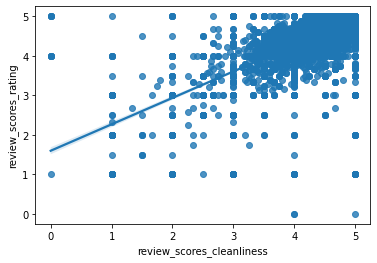

In [34]:
sns.regplot(x='review_scores_cleanliness', y='review_scores_rating', data=df_rate);

In [35]:
lr_rmse = np.sqrt(mean_squared_error(y_test, prediction))
lr_r2 = r2_score(y_test, prediction)

print('[RF_50] Root Mean Squared Error: {:.2f}'.format(lr_rmse))
print('[RF_50] R2: {:.2f}'.format(lr_r2))


[RF_50] Root Mean Squared Error: 0.24
[RF_50] R2: 0.76


In [36]:
# Creating a seperate model to see all the different weights
model2 = LinearRegression()
 
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)

print('Model Summary:\n')

# intercept (alpha)
print('Intercept:')
print('alpha = ' , model2.intercept_)

features = df_rate.columns

print('\nWeights:')
i = 0
for w in model2.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -0.20749568679214558

Weights:
w_ 1 =  0.028262019089592864  [ weight of  host_response_rate ]
w_ 2 =  1.1535043753507779e-14  [ weight of  host_is_superhost ]
w_ 3 =  -6.397541915755762e-06  [ weight of  host_listings_count ]
w_ 4 =  -0.000786758274833189  [ weight of  accommodates ]
w_ 5 =  0.0002542325101726617  [ weight of  bathrooms ]
w_ 6 =  -0.01088102781306015  [ weight of  bedrooms ]
w_ 7 =  -0.0012884322749584216  [ weight of  beds ]
w_ 8 =  0.00010420865032946316  [ weight of  price ]
w_ 9 =  0.01927575910479415  [ weight of  has_availability ]
w_ 10 =  -9.61837240857186e-05  [ weight of  availability_30 ]
w_ 11 =  -0.0010611150624501478  [ weight of  availability_60 ]
w_ 12 =  0.0005023369914073971  [ weight of  availability_90 ]
w_ 13 =  1.4272674817657965e-05  [ weight of  availability_365 ]
w_ 14 =  -0.00016616570719236136  [ weight of  number_of_reviews ]
w_ 15 =  -3.911018606386252e-05  [ weight of  number_of_reviews_ltm ]
w_ 16 =  0

In [37]:
# Print mean squared error

#print('\nModel Performance\n\nRMSE =   %.2f'
#      % np.sqrt(mean_squared_error(y_test, prediction2)))
# The coefficient of determination: 1 is perfect prediction
#print(' R^2 =   %.2f'
#      % r2_score(y_test, prediction2))

lr_rmse = np.sqrt(mean_squared_error(y_test, prediction2))
lr_r2 = r2_score(y_test, prediction2)

print('[LR] Root Mean Squared Error: {:.2f}'.format(lr_rmse))
print('[LR] R2: {:.2f}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.24
[LR] R2: 0.76


### <font color=tomato>Decision Tree Regressor</font>

In [38]:
from sklearn.tree import DecisionTreeRegressor
max_depth = [4, 8, 12, 16]
min_samples_leaf = [5, 10, 25, 50]
param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()

# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(dt_regressor, param_grid, cv = 3,scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)


print('Done')

dt_rmse1 = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(dt_rmse1) )


Running Grid Search...
Done
[DT] RMSE for the best model is : 0.25


In [39]:
dt_best_params = dt_grid.best_params_

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

In [40]:
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 25)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=25, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
y_dt_pred = dt_grid_search.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared = False)

dt_r2 = r2_score(y_test,y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.25174720030572334
[DT] R2: 0.7460354510613407


## <font color=teal>Random Forest</font>

In [42]:
print('Begin RF_100 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_100_model = RandomForestRegressor(n_estimators = 100, max_depth = 32)

# 2. Fit the model to the training data below
rf_100_model.fit(X_train, y_train)

# scoring
y_rf_pred_100 = rf_100_model.predict(X_test)

rf_rmse_100 = mean_squared_error(y_test, y_rf_pred_100, squared=False)

rf_r2_100 = r2_score(y_test, y_dt_pred)

                   
print('[RF_100] Root Mean Squared Error: {0}'.format(rf_rmse_100))
print('[RF_100] R2: {0}'.format(rf_r2_100))    

print()

print('Begin RF_20 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_20_model = RandomForestRegressor(n_estimators = 20, max_depth = 32)

# 2. Fit the model to the training data below
rf_20_model.fit(X_train, y_train)

# scoring
y_rf_pred_20 = rf_20_model.predict(X_test)

rf_rmse_20 = mean_squared_error(y_test, y_rf_pred_20, squared=False)

rf_r2_20 = r2_score(y_test, y_dt_pred)

                   
print('[RF_20] Root Mean Squared Error: {0}'.format(rf_rmse_20))
print('[RF_20] R2: {0}'.format(rf_r2_20))    

print()
    
print('Begin RF_50 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_50_model = RandomForestRegressor(n_estimators = 20, max_depth = 32)

# 2. Fit the model to the training data below
rf_50_model.fit(X_train, y_train)

# scoring
y_rf_pred_50 = rf_50_model.predict(X_test)

rf_rmse_50 = mean_squared_error(y_test, y_rf_pred_50, squared=False)

rf_r2_50 = r2_score(y_test, y_dt_pred)

                   
print('[RF_50] Root Mean Squared Error: {0}'.format(rf_rmse_50))
print('[RF_50] R2: {0}'.format(rf_r2_50))    

print()
print('End')

Begin RF_100 Implementation...
[RF_100] Root Mean Squared Error: 0.23163593161461973
[RF_100] R2: 0.7460354510613407

Begin RF_20 Implementation...
[RF_20] Root Mean Squared Error: 0.23783779015754744
[RF_20] R2: 0.7460354510613407

Begin RF_50 Implementation...
[RF_50] Root Mean Squared Error: 0.23825986185870796
[RF_50] R2: 0.7460354510613407

End


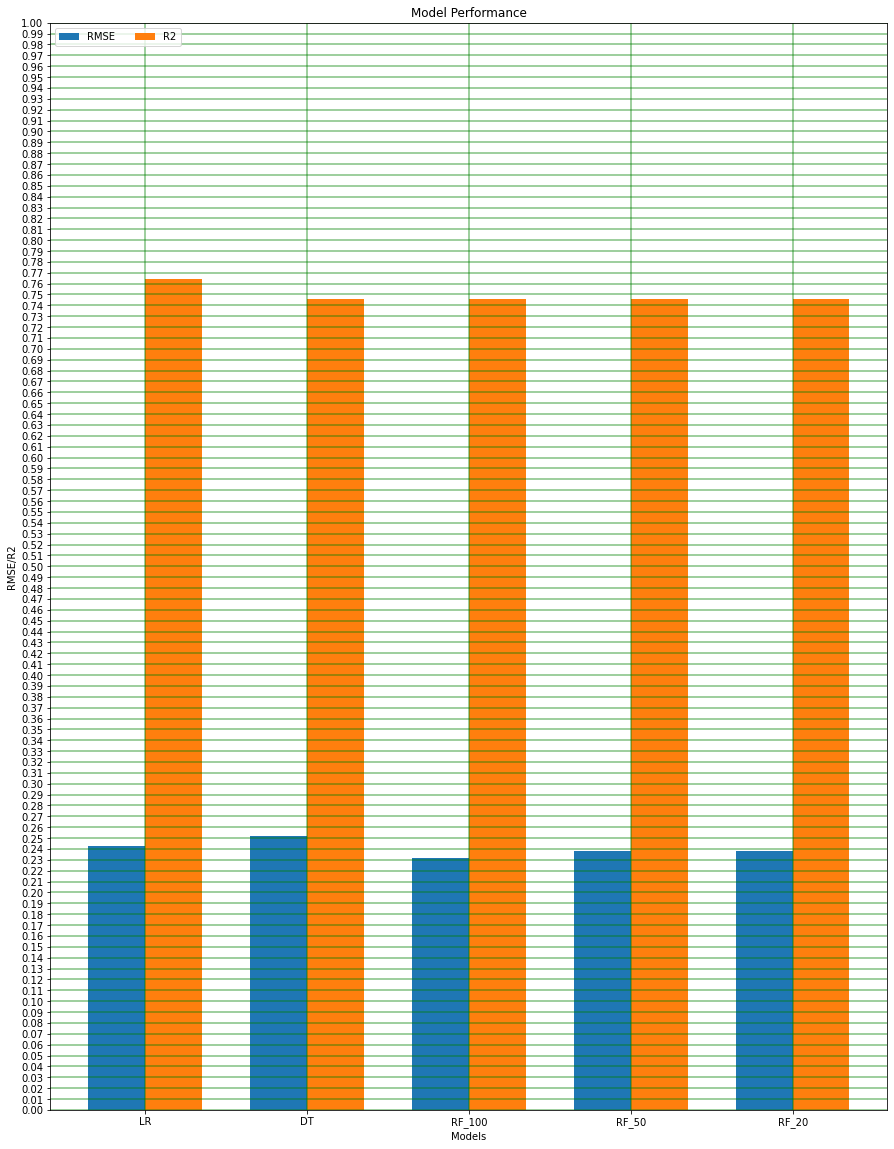

In [43]:
import matplotlib.pyplot as plt
RMSE_Results = [lr_rmse, dt_rmse, rf_rmse_100, rf_rmse_50, rf_rmse_20]
R2_Results = [lr_r2, dt_r2, rf_r2_100, rf_r2_50, rf_r2_20]
labels = ['LR', 'DT', 'RF_100', 'RF_50', 'RF_20']

rg= np.arange(5)
width = 0.35

plt.figure(figsize=(15, 20))

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.yticks(np.arange(0, 1.1, 0.01))  # Specify the desired tick positions and labels
plt.ylim([0, 1])

plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

## <font color = orange>As we can see from the plot, The linear regression has the best R^2 score but the Random Forest with 100 estimators has the lowest mean squared error. Because we know that random forests take a little longer to produce outputs, it might be better to go with linear regression based on your problem.</font>